# Customer Churn

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/IBM_AI_Engineering/portfolio-7.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Train a Logistic Regression classifier to predict customer churn for a telecom company.

While [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) is a variation of Linear Regression, used when the observed dependent variable is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import seaborn as sns
sns.set_style("whitegrid")

## Load the dataset

In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
df = pd.read_csv(file_url)
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Understand the dataset

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.

The dataset includes information about:

- Customers who left within the last month – the column is called Churn.
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
- Demographic info about customers – gender, age range, and if they have partners and dependents.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

## Preprocess the dataset

In [4]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
df['churn'] = df['churn'].astype('int')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Visualize the dataset

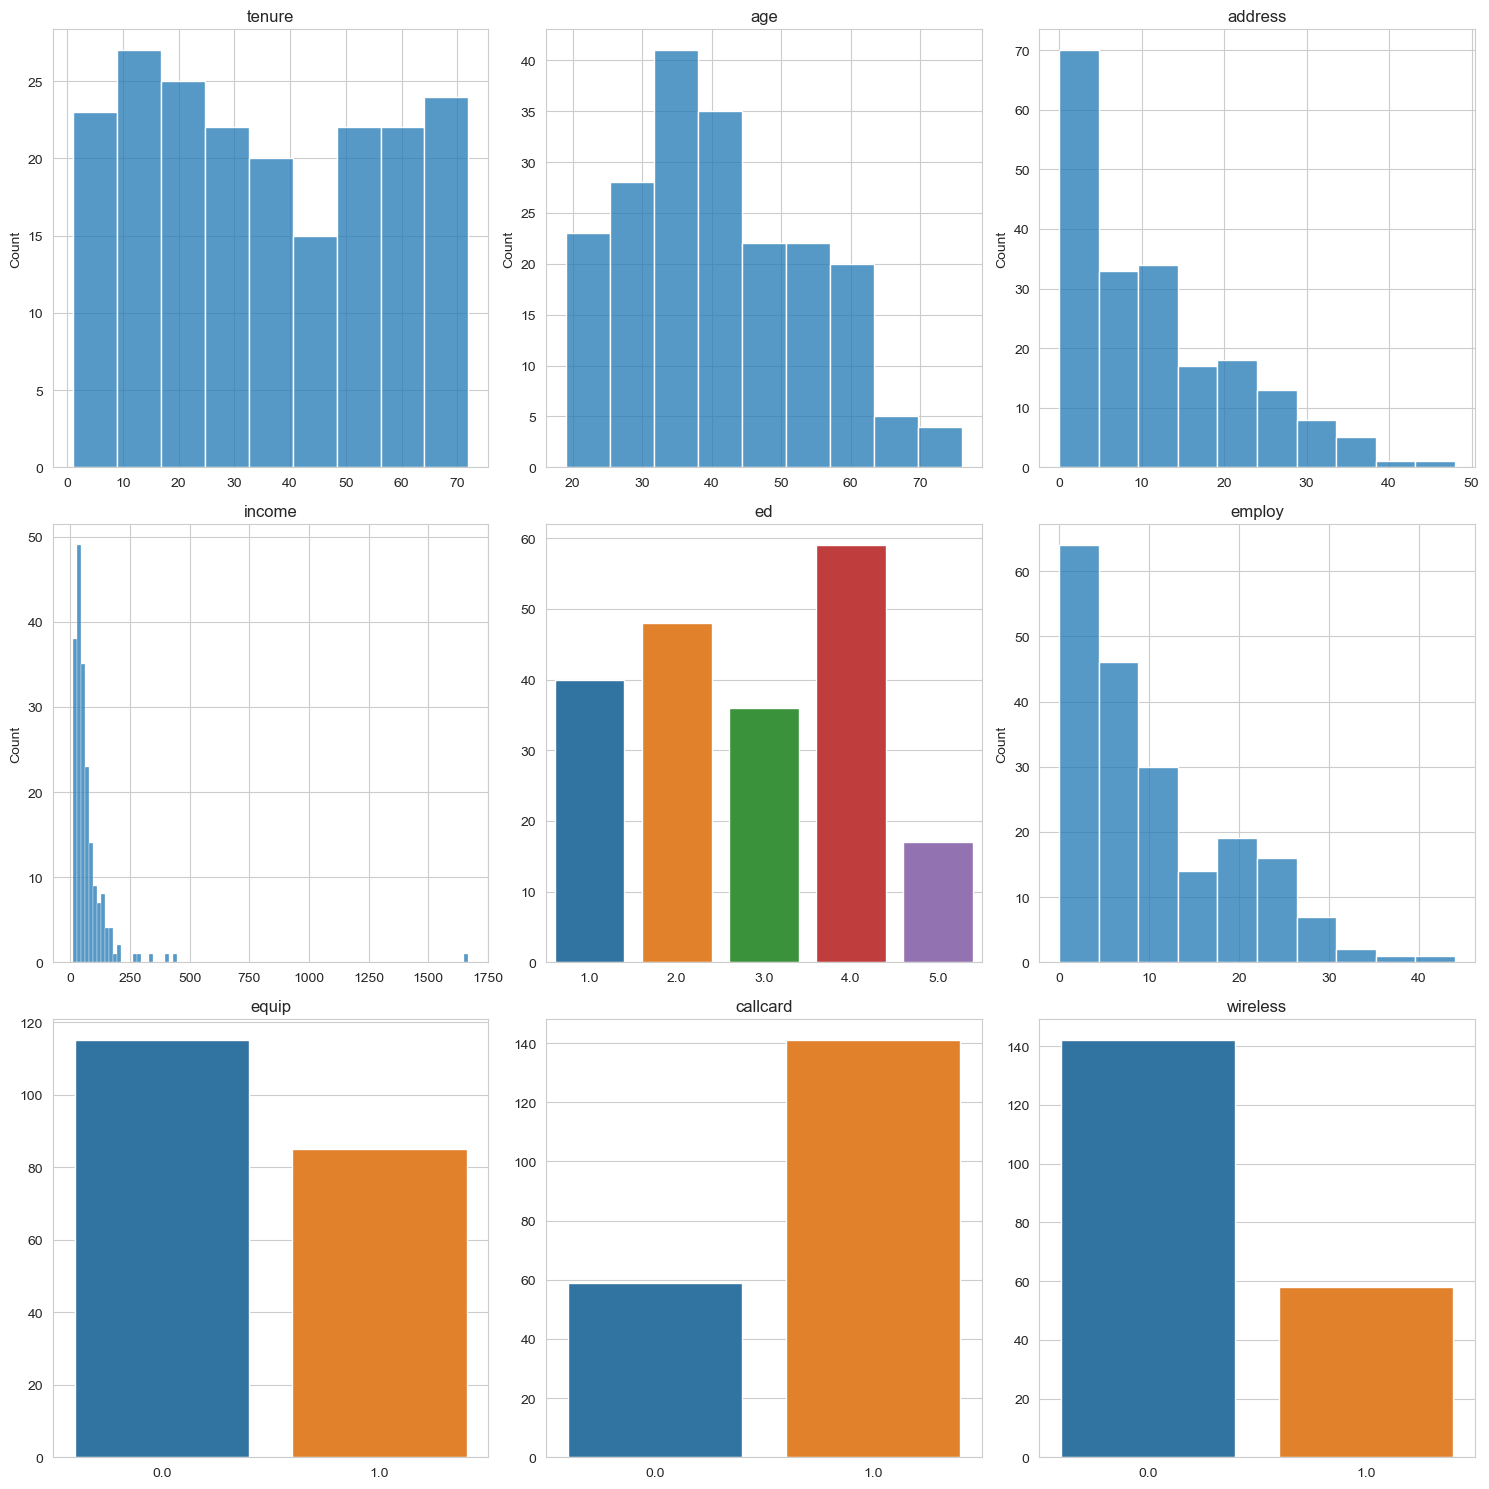

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, feature in zip(axs.flatten(), df.columns):
    if len(df[feature].unique()) <= 10:
        labels, sizes = np.unique(df[feature], return_counts=True)
        sns.barplot(x=labels, y=sizes, hue=labels, ax=ax, palette="tab10", legend=False)
        ax.set_xlabel("")
        ax.set_title(feature)
    else:
        sns.histplot(data=df, x=feature, ax=ax)
        ax.set_xlabel("")
        ax.set_title(feature)

plt.tight_layout()
plt.show()

## Visualize the class distribution

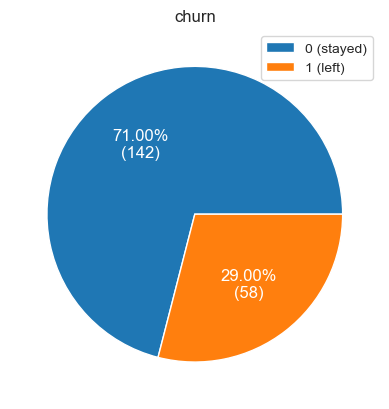

In [6]:
labels, sizes = np.unique(df["churn"], return_counts=True)

fig, ax = plt.subplots()
ax.pie(sizes, textprops={'color': "w", 'fontsize': '12'}, autopct=lambda pct: "{:.2f}%\n({:d})".format(pct, round(pct/100 * sum(sizes))))
ax.legend(["1 (left)" if label else "0 (stayed)" for label in labels])
ax.set_title("churn")
plt.show()

## Normalize the dataset

In [7]:
X = df.drop("churn", axis=1)
y = df["churn"]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns[:-1])
X.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless
0,-1.135184,-0.625955,-0.458897,0.475142,1.696129,-0.584778,-0.859727,0.646869,1.564697
1,-0.116043,-0.625955,0.034541,-0.328861,-0.643359,-1.144375,-0.859727,-1.545908,-0.639101
2,-0.579289,-0.855944,-0.261522,-0.352278,-1.423189,-0.920536,-0.859727,-1.545908,-0.639101
3,0.115580,-0.472629,-0.656272,0.006791,-0.643359,-0.025182,1.163160,0.646869,1.564697
4,-1.320483,-0.472629,0.231916,0.038015,-0.643359,0.534415,-0.859727,0.646869,-0.639101


## Split the dataset into train and test subsets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (150, 9)
X_test shape: (50, 9)


## Train a Logistic Regression model

The Logistic Regression supports [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)#Regularization_in_machine_learning) that is a technique used to solve the [overfitting](https://en.wikipedia.org/wiki/Overfitting#Machine_learning) problem of machine learning models. `C` hyperparameter indicates the inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization.

In [9]:
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

## Evaluate the model

              precision    recall  f1-score   support

           0     0.8919    0.8684    0.8800        38
           1     0.6154    0.6667    0.6400        12

    accuracy                         0.8200        50
   macro avg     0.7536    0.7675    0.7600        50
weighted avg     0.8255    0.8200    0.8224        50



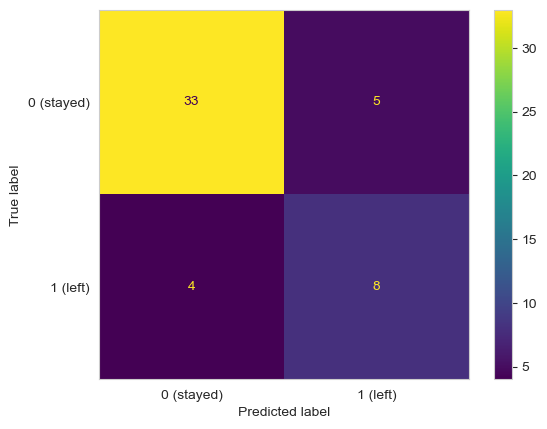

In [10]:
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (stayed)", "1 (left)"])
plt.grid(False)
plt.show()